In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = "arial"
plt.rcParams['font.family'] = "arial"
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 3 #set the value globally

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3

In [ ]:
main_folder = 'demo'
folders = ['hex100nm-4nm', 'kite80nm-6nm']
kind = ['hex', 'kite'] 
lat_space = np.array([2, 2]) 
ylength = ['100', '80'] 
shell = True 

## Plot Shapes 

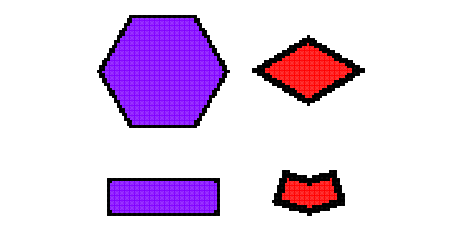

In [2]:
fig, ax = plt.subplots(1,1,figsize=[8,4])
colors = plt.cm.rainbow(np.linspace(0,1,len(folders)))

horz_shift = 20
vert_shift = 100

xrange = np.zeros((2, len(folders)))
yrange = np.zeros((2, len(folders)))
zrange = np.zeros((2, len(folders)))

for idx, val in enumerate(folders):
    data = np.loadtxt( str('../data_files/')+str(main_folder)+str('/spectra/') + str(val) + str('/shape.dat'),skiprows=7)    
    x = data[:,1]*float(lat_space[idx])
    y = data[:,2]*float(lat_space[idx])
    z = data[:,3]*float(lat_space[idx])    
    xrange[0, idx], xrange[1, idx] = min(x), max(x)
    yrange[0, idx], yrange[1, idx] = min(y), max(y)
    zrange[0, idx], zrange[1, idx] = min(z), max(z)

    if idx == 0: right_offset = 0
    else: right_offset += yrange[1,idx-1] + horz_shift - yrange[0,idx]
    
    ICOMP = data[:,4]
    idx_plotm = np.where((ICOMP==1) & (y==0))
    idx_plots = np.where((ICOMP==2) & (y==0))
    
    ax.scatter(z[idx_plotm]+right_offset, x[idx_plotm]-vert_shift, marker='s', alpha=0.8, color=colors[idx], s=2)
    ax.scatter(z[idx_plots]+right_offset, x[idx_plots]-vert_shift, marker='s', c='black', s=2)

    idx_plotm = np.where((ICOMP==1) & (x==0))
    idx_plots = np.where((ICOMP==2) & (x==0))
    ax.scatter(y[idx_plotm]+right_offset, z[idx_plotm], marker='s', alpha=0.8, color=colors[idx], s=2)
    ax.scatter(y[idx_plots]+right_offset, z[idx_plots], marker='s', c='black', s=2)   
    
ax.axis('equal');
ax.axis('off');

# fig.savefig('shapes.png')

## Plot Spectra

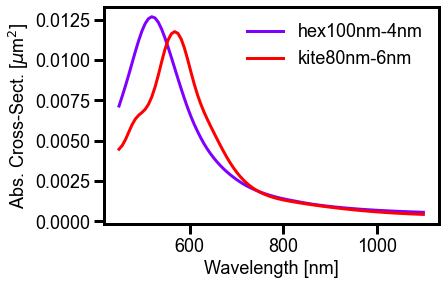

In [3]:
wave = []
abs_cross = []

## Load data
for idx, val in enumerate(folders):
    data = np.loadtxt( str('../data_files/')+str(main_folder)+str('/spectra/') + str(val) + str('/Spectrum'),skiprows=7)    
    data_spectra =  data[data[:,1].argsort(),]
    wave.append(data_spectra[:,1]*1000)
    abs_cross.append(data_spectra[:,3]*np.pi*data_spectra[:,0]**2)
    
    
## Plot data 
for idx, val in enumerate(folders):
    plt.plot(wave[idx], abs_cross[idx], color=colors[idx], label=str(val))


plt.xlabel('Wavelength [nm]')
plt.ylabel('Abs. Cross-Sect. [$\mu$m$^2$]');
plt.legend(frameon=False);

## Plot Temperatures

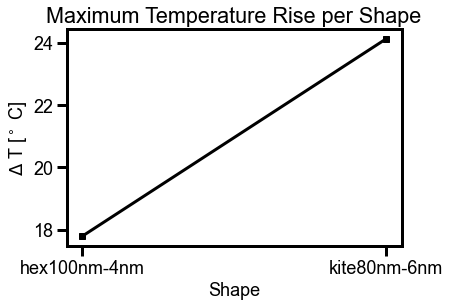

In [13]:
maxT = np.zeros(len(folders))

for idx, val in enumerate(folders):    
    data = np.loadtxt( str('../data_files/')+str(main_folder)+str('/temps/') + str(val) + str('/temp.out'),skiprows=12)    
    maxT[idx] = max(data[:,3])

plt.plot(folders, maxT, color='black', marker='s')
plt.xlabel('Shape');
plt.ylabel('$\Delta$ T [$^\circ$ C]');
plt.title('Maximum Temperature Rise per Shape');
    
    
    